## Задача: Определение статистической значимости изменений метрик в результате проведения Акции в магазине.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import descriptivestats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_excel('Копия data_interval_test(3502).xlsx')
df

,actionGroup,magazin,days,Revenue,# Checks,Qty,Avg Check Size,Avg Check,before days,before Revenue,before # Checks,before Qty,before Avg Check Size,before Avg Check
0,Акция 1,1,16,36987.2800,132,220,1.666667,280.206667,16.0,24969.4400,92.0,150.0,1.6304,271.406957
1,Акция 1,2,16,70944.0428,358,636,1.776536,198.167717,16.0,82326.7109,299.0,473.0,1.5819,275.340170
2,Акция 1,3,16,93335.7800,440,791,1.797727,212.126773,16.0,68219.6800,291.0,411.0,1.4124,234.431890
3,Акция 1,4,16,28390.5000,130,168,1.292308,218.388462,16.0,22224.9300,124.0,139.0,1.1210,179.233306
4,Акция 1,5,16,35707.3400,122,165,1.352459,292.683115,16.0,17469.5100,85.0,106.0,1.2471,205.523647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Акция 1,441,16,24352.6200,132,197,1.492424,184.489545,16.0,14462.4000,83.0,99.0,1.1928,174.245783
441,Акция 1,442,15,24500.6700,91,141,1.549451,269.238132,16.0,18177.1700,50.0,59.0,1.1800,363.543400
442,Акция 1,443,9,7653.2800,15,24,1.600000,510.218667,7.0,1669.6900,10.0,11.0,1.1000,166.969000
443,Акция 1,444,16,29977.3000,126,154,1.222222,237.915079,15.0,18961.5800,62.0,71.0,1.1452,305.831935


In [5]:
df = df.drop(['actionGroup','magazin'], axis = 1 )

In [7]:
index = ['days', 'Revenue', '# Checks', 'Qty', 'Avg Check Size', 'Avg Check',
       'before days', 'before Revenue', 'before # Checks', 'before Qty',
       'before Avg Check Size', 'before Avg Check']

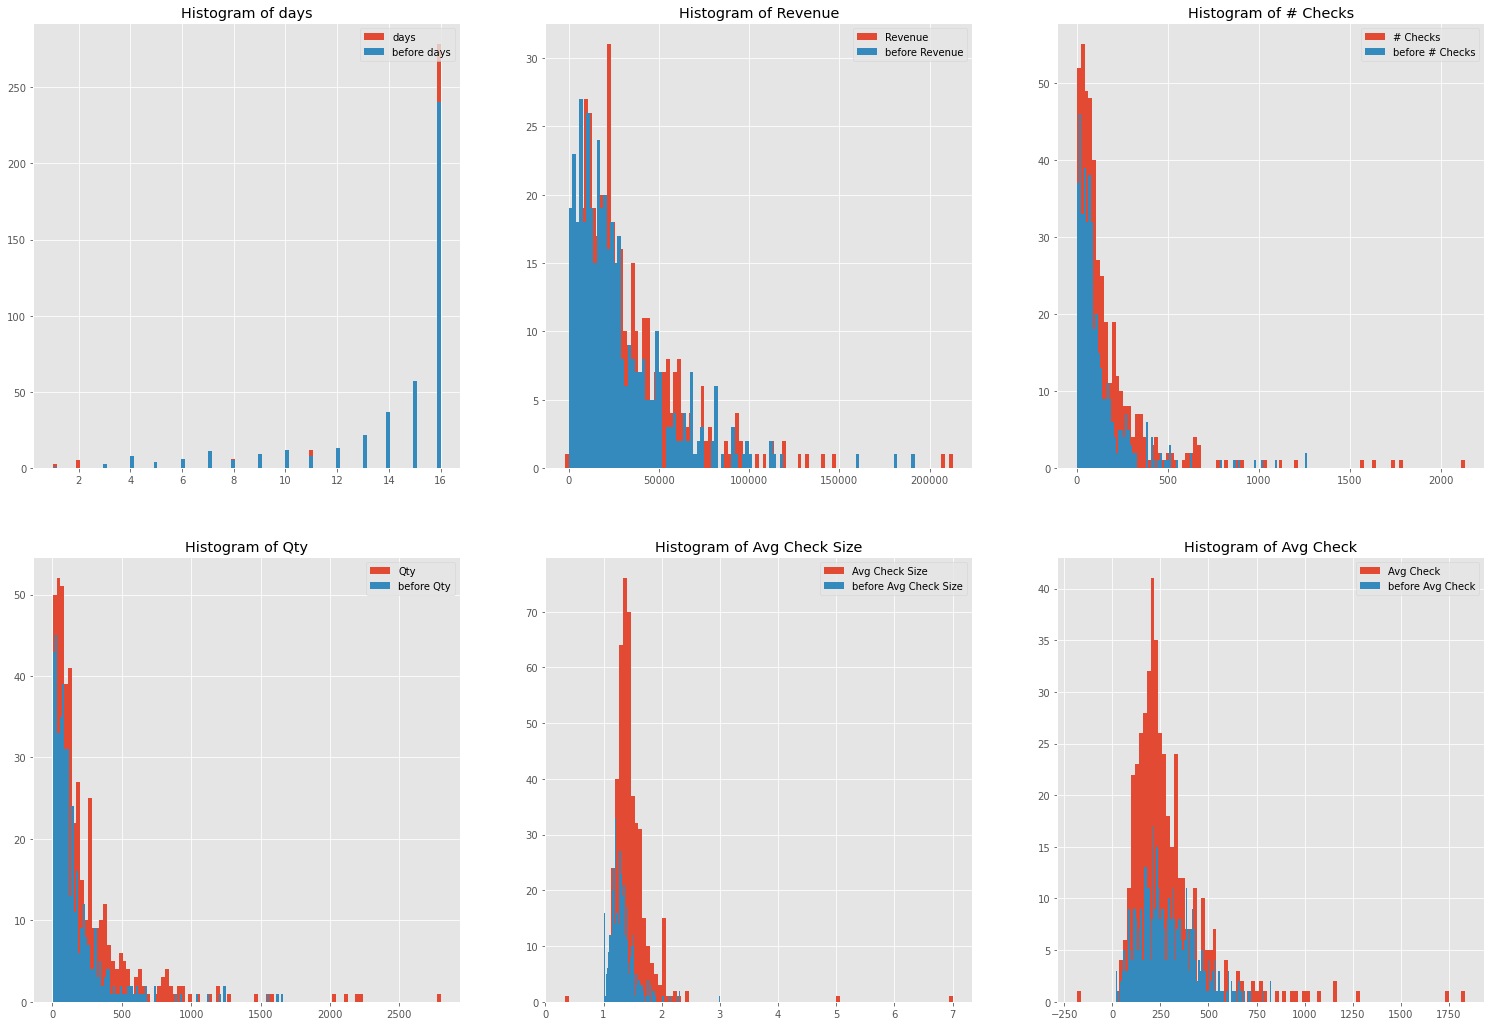

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(26,18)) 
ind=0
for i in range(2):
    for j in range(3):
        ax[i, j].hist(df[index[ind]], bins=100, label = index[ind])
        ax[i, j].hist(df[index[ind+6]], bins=100, label = index[ind+6])
        ax[i, j].set_title('Histogram of {}'.format(index[ind]))
        ax[i, j].legend(loc='upper right')
        ind+=1

Определим статистическую значимость изменения метрики Revenue с критерия Уилксона, так как распределение визуально не похоже на нормальное и мы не можем применять критерий Стьюдента.

In [9]:
stats.wilcoxon(df['Revenue'], df['before Revenue'])

WilcoxonResult(statistic=21642.0, pvalue=6.608440798659654e-25)

Так как pvalue очень мала, гипотеза о том, что Revenue не изменилась в следсивии эксперимента отвергается.

Определим статистическую значимость остальных изменения остальных метрик.

In [10]:
metrics = ['Revenue', '# Checks', 'Qty', 'Avg Check Size', 'Avg Check']
metrics

['Revenue', '# Checks', 'Qty', 'Avg Check Size', 'Avg Check']

In [11]:
result_pvalue= pd.DataFrame(index= metrics, columns=('pvalue','result'))

In [16]:
index = ['Revenue', '# Checks', 'Qty', 'Avg Check Size', 'Avg Check',
       'before Revenue', 'before # Checks', 'before Qty',
       'before Avg Check Size', 'before Avg Check']
vec_pvalue = []
vec_result = []
for i in range(len(metrics)):
    _, pvalue = stats.wilcoxon(df[index[i]], df[index[i+5]])
    vec_pvalue.append(pvalue)
    vec_result.append('False') if pvalue <= 0.05 else vec_result.append('True')
result_pvalue['pvalue'] = vec_pvalue
result_pvalue['result'] = vec_result


In [17]:
result_pvalue

,pvalue,result
Revenue,6.608441e-25,False
# Checks,6.233538e-64,False
Qty,1.027143e-67,False
Avg Check Size,1.774326e-32,False
Avg Check,1.521409e-05,False


Тест Уилсона показал, что по изменениям всех метрик pvalue оказалась очень мала, поэтому можно отвергуть гипотезу о том, что изменений не наблюдается.

Проверим результаты на двухвыборочном критерие знаков.

In [18]:
result_pvalue_sign= pd.DataFrame(index= metrics, columns=('pvalue','result'))

In [19]:
vec_pvalue = []
vec_result = []
for i in range(len(metrics)):
    _, pvalue = descriptivestats.sign_test(df[index[i]]-df[index[i+5]])
    vec_pvalue.append(pvalue)
    vec_result.append('False') if pvalue <= 0.05 else vec_result.append('True')
result_pvalue_sign['pvalue'] = vec_pvalue
result_pvalue_sign['result'] = vec_result

In [20]:
result_pvalue_sign

,pvalue,result
Revenue,3.514632e-20,False
# Checks,8.590836e-70,False
Qty,6.167579e-84,False
Avg Check Size,7.393942e-27,False
Avg Check,4.444917e-05,False


Согласно обоим тестам по изменениям всех метрик pvalue оказалась очень мала, можно сделать вывод, что по всем метрикам мы наблюдаем статистически значимые отличия 